In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
paint_colors = pd.read_csv("https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/bob_ross_paintings.csv")
objects = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-06/bob-ross.csv")
objects['season'] = objects['EPISODE'].str[1:3]
objects['season'] = objects['season'].astype(int)
objects['episode'] = objects['EPISODE'].str[4:]
objects['episode'] = objects['episode'].astype(int)
df = paint_colors.merge(objects, on = ['episode', 'season'])

In [3]:
df['num_colors'].describe()

count    403.000000
mean      10.650124
std        2.388648
min        1.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       15.000000
Name: num_colors, dtype: float64

In [4]:
df_winter = df[(df['season'] == 9) & (df['episode'] == 5)]
df_winter

,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
108,109,181,https://www.twoinchbrush.com/images/painting18...,Winter Oval,9,5,7,https://www.youtube.com/embed/pYWiLm_-sXw,"['Alizarin Crimson', 'Bright Red', 'Dark Sienn...","['#4E1500', '#DB0000', '#5F2E1F', '#000000', '...",...,0,1,1,0,0,0,0,0,0,0


In [5]:
df_frame = df[df['OVAL_FRAME'] == 1]
df_frame.head()

,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
108,109,181,https://www.twoinchbrush.com/images/painting18...,Winter Oval,9,5,7,https://www.youtube.com/embed/pYWiLm_-sXw,"['Alizarin Crimson', 'Bright Red', 'Dark Sienn...","['#4E1500', '#DB0000', '#5F2E1F', '#000000', '...",...,0,1,1,0,0,0,0,0,0,0
125,126,172,https://www.twoinchbrush.com/images/painting17...,Mountain Oval,10,9,11,https://www.youtube.com/embed/Qj6lMtnCt8o,"['Bright Red', 'Cadmium Yellow', 'Dark Sienna'...","['#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '...",...,0,1,1,0,0,0,0,0,0,0
135,136,155,https://www.twoinchbrush.com/images/painting15...,Oval Barn,11,6,6,https://www.youtube.com/embed/HqBhCibidNM,"['Bright Red', 'Dark Sienna', 'Midnight Black'...","['#DB0000', '#5F2E1F', '#000000', '#021E44', '...",...,0,1,1,0,0,0,0,0,1,0
137,138,157,https://www.twoinchbrush.com/images/painting15...,Sunset Oval,11,8,11,https://www.youtube.com/embed/9xG6IzcGotI,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '...",...,0,1,1,0,0,0,0,0,0,0
154,155,148,https://www.twoinchbrush.com/images/painting14...,Mountain in an Oval,12,12,11,https://www.youtube.com/embed/1jRPshs27H8,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '...",...,0,1,1,0,0,0,0,0,0,0


In [11]:
total_oval = len('OVAL')
total_oval

4

In [14]:
means = []

for i in range(5000):
    sample = df['num_colors'].sample(n=total_oval, replace= True)
    means.append(sample.mean())

means = np.array(means)

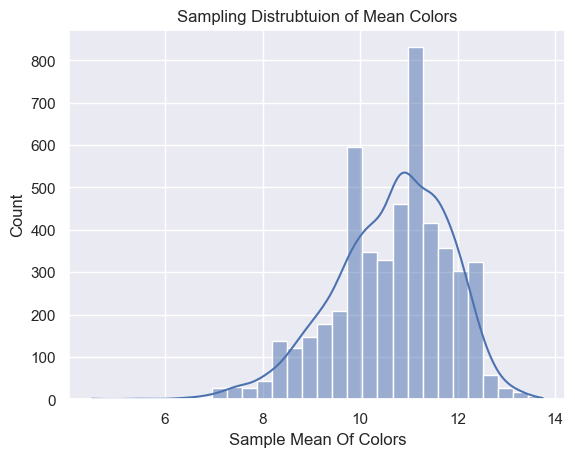

In [24]:
sns.histplot(means, bins=30, kde= True)
plt.xlabel("Sample Mean Of Colors")
plt.title("Sampling Distrubtuion of Mean Colors")
plt.show()

In [19]:
prop_31 = []
for i in range(1000):
    sample = df['OVAL_FRAME'].sample(n=31, replace=True)
    prop_31.append(sample.mean())
prop_31 = np.array(prop_31)

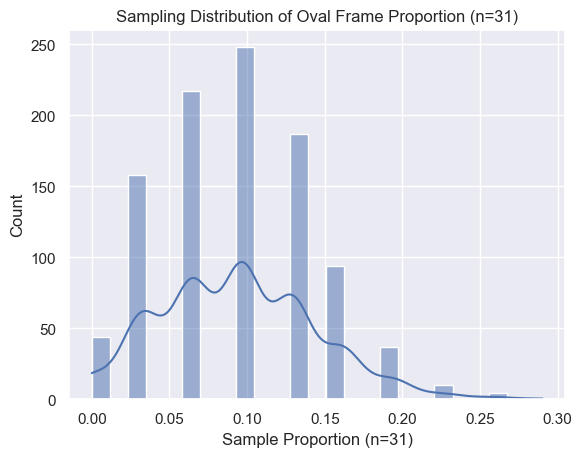

In [23]:

sns.histplot(prop_31, bins=25, kde=True)
plt.xlabel("Sample Proportion (n=31)")
plt.title("Sampling Distribution of Oval Frame Proportion (n=31)")
plt.show()

In [17]:
prop_13 = []
for i in range(5000):
    sample = df['OVAL_FRAME'].sample(n=13, replace=True)
    prop_13.append(sample.mean())
prop_13 = np.array(prop_13)

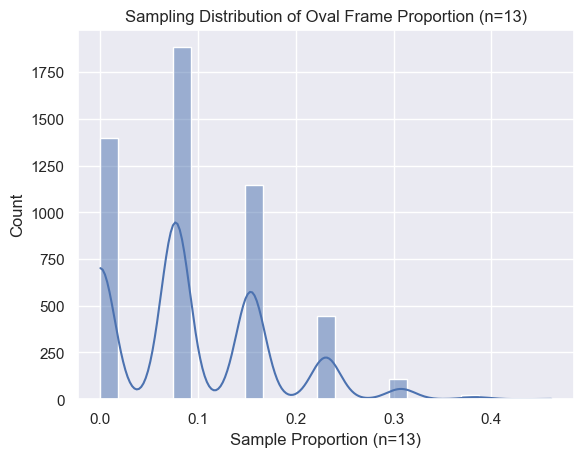

In [25]:
sns.histplot(prop_13, bins=25, kde=True)
plt.xlabel("Sample Proportion (n=13)")
plt.title("Sampling Distribution of Oval Frame Proportion (n=13)")
plt.show()